**MICKEY ZHANG**

CS 251/2: Data Analysis and Visualization

# Polynomial Regression Lab (Part B)

In [1]:
import os
import random
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'figure.figsize': (10,6)})

np.set_printoptions(suppress=True, precision=5)

## Task 1: Import  datasets

1. Import fit (`'data/lab3b-400-fit.csv'`) and validation ('data/lab3b-100-val.csv') datasets into separate ndarrays using [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html) or your `Data` class.
2. The column 'x' is the independent variable.  Columns 'y1', 'y2', and 'y3' are dependent variables.  We will only be using y1.
3. Print the first 5 rows of each dataset.
4. Make two scatter plots: one for your fit set and one for your validation set. In each, plot column 'x' and 'y1', with a title and axis labeled. 

Text(0, 0.5, 'y1')

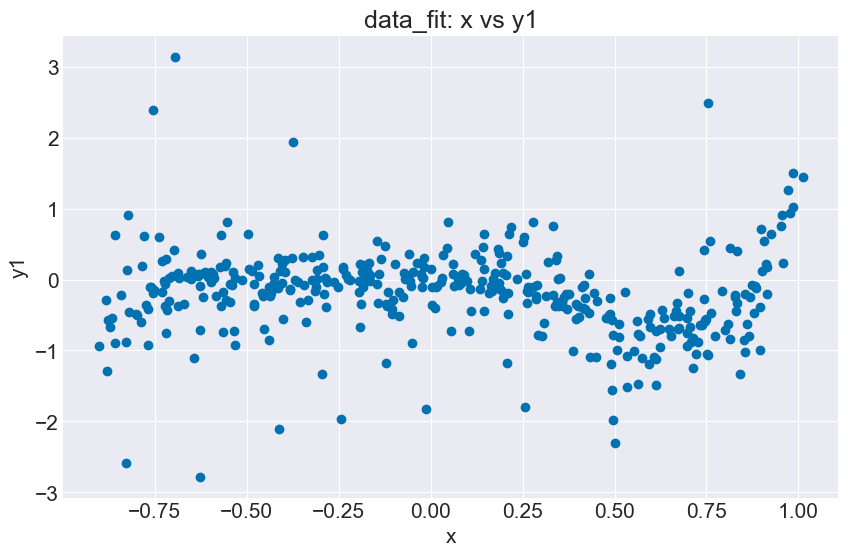

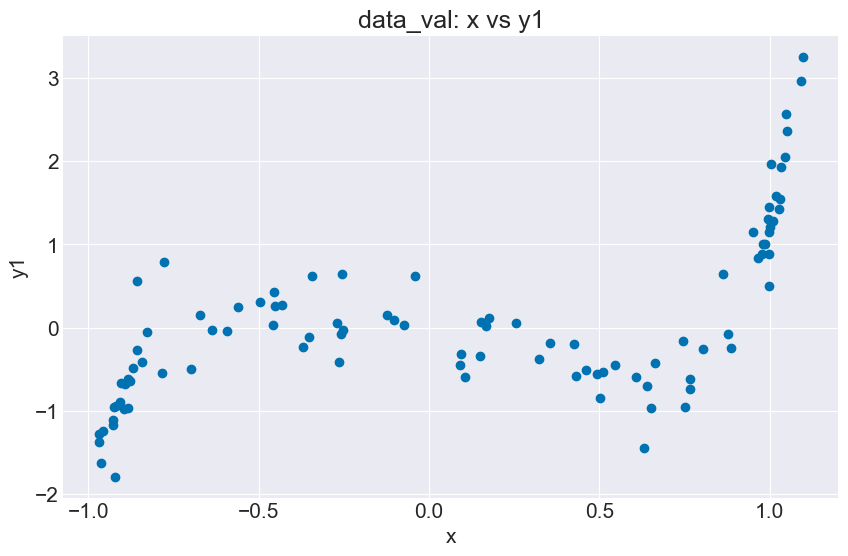

In [15]:
### BEGIN SOLUTION

data_fit = np.genfromtxt("data/lab3b-400-fit.csv", delimiter=',')[2:]
data_val = np.genfromtxt("data/lab3b-100-val.csv", delimiter=',')[2:]

# fit scatter
plt.figure()
plt.scatter(data_fit[:, 0], data_fit[:, 1])
plt.title("data_fit: x vs y1")
plt.xlabel("x")
plt.ylabel('y1')

# val scatter
plt.figure()
plt.scatter(data_val[:, 0], data_val[:, 1])
plt.title("data_val: x vs y1")
plt.xlabel("x")
plt.ylabel('y1')



# DONE
# print(data_fit[:5])
# print(data_val[:5])
# ### END SOLUTION

# print('''
# --------------------------------------
# Your results should look like
# --------------------------------------
# Fit dataset [Af] first 5 rows:
# [[ 0.86084 -0.62216  3.93574 11.60028]
#  [-0.30754  0.00447  4.675    8.86444]
#  [ 0.77201 -0.79127  3.94762 10.83111]
#  [-0.71808 -0.75327 11.83894  5.23568]
#  [-0.28735  0.01856  8.7937   8.49431]]
# Validation dataset [Av] first 5 rows:
# [[-0.91878 -0.9357  22.11518  4.98345]
#  [-0.92811 -1.16687 18.58222  3.34313]
#  [-0.96837 -1.36751 13.3575   3.65102]
#  [-0.96436 -1.62782 13.88831  4.08888]
#  [-0.97014 -1.2789  24.96344  3.74772]]
# ''')

## Task 2: Degree 3 Polynomial Regression

### 2a. Make 3 ndarrays

$$
\left(\begin{array}{cccc} 
1 & x_0^1 & x_0^2 & x_0^3\\
1 & x_1^1 & x_1^2 & x_1^3\\
1 & x_2^1 & x_2^2 & x_2^3\\
1 & x_3^1 & x_3^2 & x_3^3\\
1 & x_4^1 & x_4^2 & x_4^3\\
... & ... & ... & ...\\
1 & x_{N-1}^1 & x_{N-1}^2 & x_{N-1}^3\\
\end{array}\right)
$$ 

1. Make a 2D polynomial ndarray for the fit dataset using the independent variable
    2. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), `A1f`, with the same number of rows as the fit dataset and 4 columns.
    5. Update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    1. Print the first 5 rows of the matrix
2. Make a 2D polynomial ndarray for the validation dataset
    3. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), `A1v`, with the same number of rows as the validation dataset and 4 columns
    5. Like in the step above, update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    1. Print the first 5 rows of the matrix
3. Make a 2D polynomial ndarray to graph the values on the regression curve.
    1. Create a 1D ndarray via [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html), `line_x`, spanning the range (i.e. min/max) of the validation dataset's x column values with 100 steps.
    2. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), `x_p`, with the same number of rows as the length of `line_x` and 4 columns
    3. Update the second column to be `line_x`, the third column to be `line_x` squared, and the fourth column to be `line_x` cubed.
    4. Print the first 5 rows of the matrix


In [ ]:
### BEGIN SOLUTION

# ===== BEIGN A1f =====

ones_col = np.ones((len(data_fit), 1))

A1f_x = data_fit[:, 0].reshape(-1, 1)

A1f = np.hstack([ones_col, A1f_x, A1f_x**2, A1f_x**3] )

print(f"A1f first 5 rows\n{A1f[:5]}")

# ===== END A1f =====


# ===== BEGIN A1v =====

ones_col = np.ones((len(data_val), 1))

A1v_x = data_val[:, 0].reshape(-1, 1)

A1v = np.hstack([ones_col, A1v_x, A1v_x**2, A1v_x**3])

print(f"A1v first 5 rows\n{A1v[:5]}")

# ===== END A1v =====


# ===== BEGIN x_p =====

line_x = np.linspace(np.min(A1v_x), np.max(A1v_x), 100).reshape(-1, 1)

ones_col = np.ones((len(line_x), 1))

x_p = np.hstack([ones_col, line_x, line_x**2, line_x**3])


print(f"x_p first 5 rows\n{x_p[:5]}")

# ===== END x_p =====


### END SOLUTION

print('''
--------------------------------------
Your results should look like
--------------------------------------
A1f first 5 rows
[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
A1v first 5 rows
[[ 1.      -0.91878  0.84417 -0.77561]
 [ 1.      -0.92811  0.86139 -0.79946]
 [ 1.      -0.96837  0.93773 -0.90807]
 [ 1.      -0.96436  0.92999 -0.89685]
 [ 1.      -0.97014  0.94118 -0.91308]]
x_p first 5 rows
[[ 1.      -0.97014  0.94118 -0.91308]
 [ 1.      -0.94925  0.90107 -0.85534]
 [ 1.      -0.92835  0.86183 -0.80008]
 [ 1.      -0.90745  0.82347 -0.74726]
 [ 1.      -0.88656  0.78598 -0.69682]]
''')

x_p first 5 rows
[[ 1.      -0.97014  0.94118 -0.91308]
 [ 1.      -0.94925  0.90107 -0.85534]
 [ 1.      -0.92835  0.86183 -0.80008]
 [ 1.      -0.90745  0.82347 -0.74726]
 [ 1.      -0.88656  0.78598 -0.69682]]

--------------------------------------
Your results should look like
--------------------------------------
A1f first 5 rows
[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
A1v first 5 rows
[[ 1.      -0.91878  0.84417 -0.77561]
 [ 1.      -0.92811  0.86139 -0.79946]
 [ 1.      -0.96837  0.93773 -0.90807]
 [ 1.      -0.96436  0.92999 -0.89685]
 [ 1.      -0.97014  0.94118 -0.91308]]
x_p first 5 rows
[[ 1.      -0.97014  0.94118 -0.91308]
 [ 1.      -0.94925  0.90107 -0.85534]
 [ 1.      -0.92835  0.86183 -0.80008]
 [ 1.      -0.90745  0.82347 -0.74726]
 [ 1.      -0.88656  0.78598 -0.69682]]



### 2b. Calculate Degree 3 Polynomial Regression
1.  Use [scipy.linalg.lstsq]() to calculate and print the fitted coefficients and MSE for the dependent variable `y1` (i.e. dependent variable of the fit set). 
2.  Print the $R^2$ value computed on the fit set.
    

In [80]:
### BEGIN SOLUTION

from scipy.linalg import lstsq


# c vector

y_fit = data_fit[:, 1].reshape(-1, 1)

c, sse, _, _ = lstsq(A1f, y_fit)

n_fit = len(y_fit)


# MSE

MSE = (sse / n_fit)

# R2

R2 = 1 - (sse / sum((y_fit - np.mean(y_fit))**2))


print(f"c: {c.squeeze()}")
print(f"MSE: {MSE}")
print(f"R2: {R2[0]}")

### END SOLUTION

print('''
--------------------------------------
Your results should look like
--------------------------------------
c: [-0.15511 -0.96979 -0.24675  1.61541]
MSE: 0.3431335215559479
r-squared: 0.11595609001119211
''')

c: [-0.15511 -0.96979 -0.24675  1.61541]
MSE: [0.34313]
R2: 0.11595609001119211

--------------------------------------
Your results should look like
--------------------------------------
c: [-0.15511 -0.96979 -0.24675  1.61541]
MSE: 0.3431335215559479
r-squared: 0.11595609001119211



### 2c. Testing and prediction

1. Calculate the $R^2$ for the linear regressions ability predict the test dataset
    1.  Multiply `A1v` (*validation set*) with the fitted coefficients to get the predicted values
    2.  Calculate the $R^2$ value and print it computed with the *validation set* the dependent variable values `yv`.
    > $R^2 = 1 - \frac{\sum_i \left (y_i - \hat{y}_i \right )^2}{\sum_i \left (y_i - \bar{y} \right )^2}$ <br> <br> $y_i$ are the dependent variable values from the validation dataset <br> $\bar{y}$ is the mean of the dependent variable values from the validation dataset <br> $\hat{y}_i$ is the y values *predicted* by the regression

2. Print the $R^2$ for the test dataset

In [65]:
### BEGIN SOLUTION

y_pred = A1v @ c
y_val = data_val[:, 1].reshape(-1, 1)




R2_val = 1 - (np.sum((y_val - y_pred)**2) / np.sum((y_val - np.mean(y_val))**2))

### END SOLUTION
print(f"r2 validaiton: {R2_val}")

print('''
--------------------------------------
Your results should look like
--------------------------------------
r2 validation: 0.4431027176546438
''')

r2 validaiton: 0.4431027176546444

--------------------------------------
Your results should look like
--------------------------------------
r2 validation: 0.4431027176546438



## Task 3: Visualize the Results
In one plot:
1. Graph the fit set data as a scatter plot.
1. Graph the validation set data as a scatter plot (different color markers).
1. Graph the prediction regression curve
    1. the independent variable is `line_x`
    2. the dependent variable is `x_p` multiplied with the fitted coefficients.
2. Include a title (with the two $R^2$ values), axis labels, and a legend

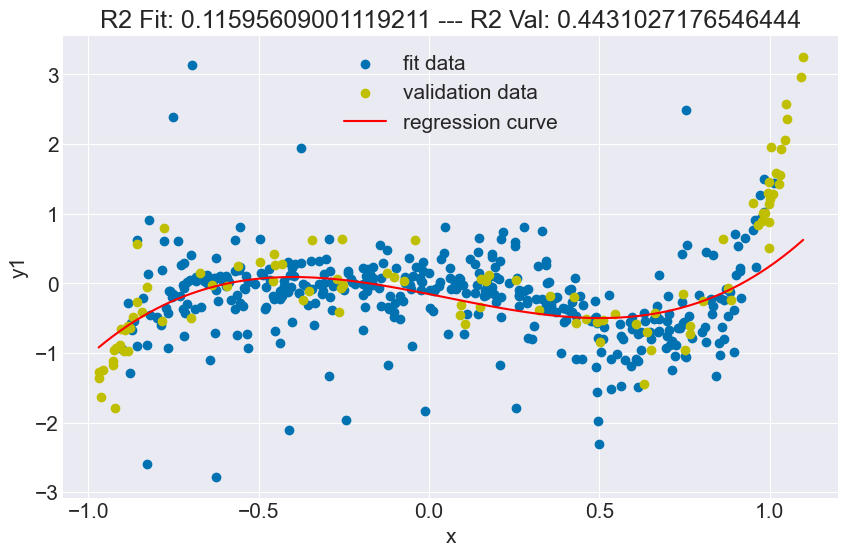

In [81]:
### BEGIN SOLUTION

plt.figure()

# fit data set
plt.scatter(A1f_x, data_fit[:, 1], label="fit data")

# val data set
plt.scatter(data_val[:, 0], data_val[:, 1], c='y', label="validation data")

x = line_x

y = x_p @ c

plt.plot(x, y, c='r', label="regression curve")

plt.title(f"R2 Fit: {R2[0]} --- R2 Val: {R2_val}")


plt.xlabel('x')
plt.ylabel('y1')
plt.legend()

### END SOLUTION

## Turn in your lab

Follow the usual submission format and submit your lab on Google Classroom.